In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
s = open("../20200622_Psyence_v10_pretrain/pre_dummy_epoch_size150.auto/report/20200622-1508/report.json", "r")
j = json.load(s)

In [3]:
funcs = ["0", "1", "2", "3", "4"]
data_accuracy_evaluation = []
for func in funcs:
    value = []
    value.append(func)
    value.append(j["indicator"]["test_auc"][func][0])
    value.append(j["indicator"]["RPsoft"][func]["good"])
    value.append(j["indicator"]["RPsoft"][func]["bad"])
    data_accuracy_evaluation.append(value)
df_accuracy_evaluation = pd.DataFrame(data=data_accuracy_evaluation)
df_accuracy_evaluation.rename(columns={0:"f", 1:"test_auc", 2:"good", 3:"bad"})
df_accuracy_evaluation.to_csv("20200624_Psyence_pretrain150.csv")
df_accuracy_evaluation

,0,1,2,3
0,0,0.527740,159,19
1,1,0.577403,168,10
2,2,0.505887,178,0
3,3,0.494546,178,0
4,4,0.533810,144,34


In [4]:
funcs = ["0", "1", "2", "3", "4"]
indicators = ["train_loss", "train_auc", "eval_loss", "eval_auc"]
data = []
for func in funcs:
    value = []
    for indicator in indicators:
        value.append(j["indicator"][indicator][func])
    data.append(value)

In [5]:
columns = j["indicator"]["epoch"]["1"]
df_best_auc_func = pd.DataFrame(data=data[1], columns=columns, index=indicators)
df_best_auc_func
df_best_auc_func.to_csv("20200624_Psyence_pretrain150.csv")

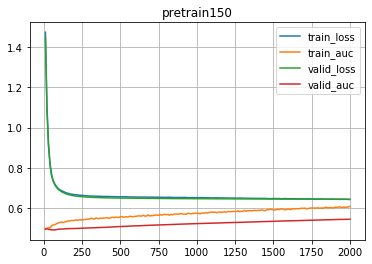

In [6]:
# 折れ線グラフを出力
left = np.array(columns)
height1 = np.array(j["indicator"]["train_loss"]["1"])
height2 = np.array(j["indicator"]["train_auc"]["1"])
height3 = np.array(j["indicator"]["eval_loss"]["1"])
height4 = np.array(j["indicator"]["eval_auc"]["1"])
plt.plot(left, height1, label="train_loss")
plt.plot(left, height2, label="train_auc")
plt.plot(left, height3, label="valid_loss")
plt.plot(left, height4, label="valid_auc")
plt.grid()
plt.legend()
plt.title("pretrain150")
plt.savefig("20200624_Psyence_pretrain150.png")